polarities:  [ True  True  True ... False False False]


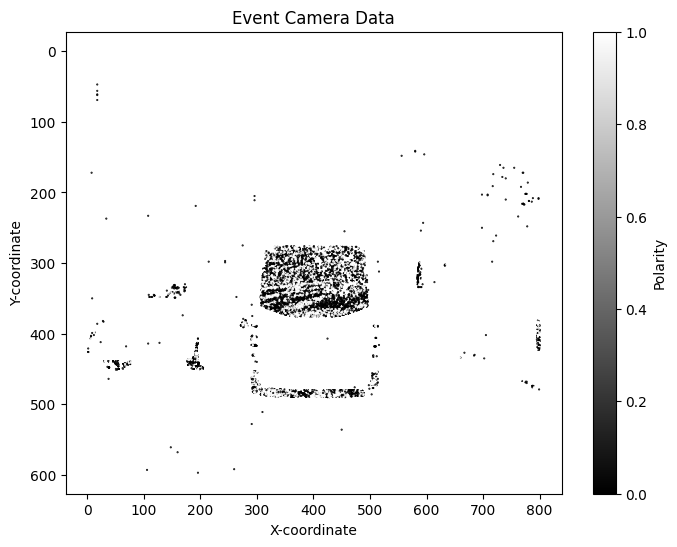

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
data = np.load('/home/irfan/research/HD_Map/HD_Map/dvs/00003910.npy', allow_pickle=True)

# Extract event data
timestamps = data.item()["t"]
x_coords = data.item()["x"]
y_coords = data.item()["y"]
polarities = data.item()["pol"]
print("polarities: ", polarities)
# Plot events
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c=polarities, cmap='gray', marker='.', s=1)
plt.title('Event Camera Data')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match typical image coordinates
plt.colorbar(label='Polarity')
plt.show()

In [5]:
import numpy as np

def combine_arrays(x, y, polarity):
    # Ensure x, y, and polarity are numpy arrays
    x = np.array(x)
    y = np.array(y)
    polarity = np.array(polarity)
    
    # Combine x and y into a 2D array
    combined = np.vstack((x, y)).T
    
    # Filter the combined array where polarity is True and coordinates are not the same
    filtered_combined = combined[polarity]
    
    # Find unique rows and their counts
    unique_rows, counts = np.unique(filtered_combined, axis=0, return_counts=True)
    
    # Select rows that appear only once
    result = unique_rows[counts == 1]
    
    return result

# Example usage




result = combine_arrays(x_coords, y_coords, polarities)
print(len(result))


744


In [2]:
print(len(x_coords))

72202


polarities:  [False  True  True ... False  True  True]


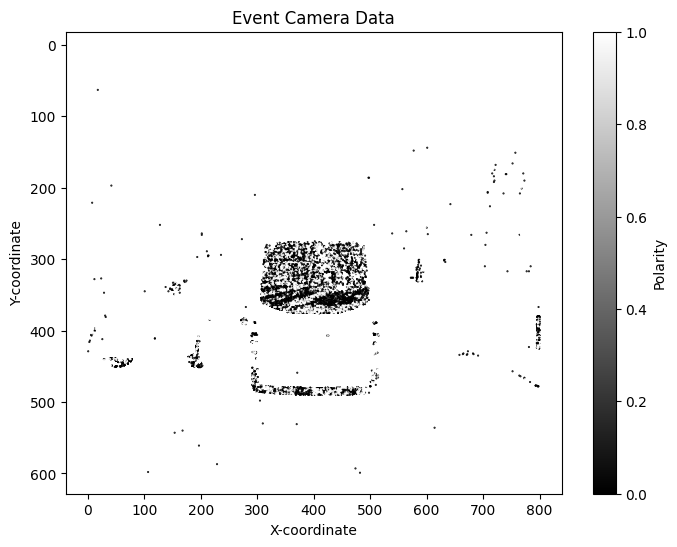

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
data2 = np.load('/home/irfan/research/HD_Map/HD_Map/dvs/00003911.npy', allow_pickle=True)

# Extract event data
timestamps2 = data2.item()["t"]
x_coords2 = data2.item()["x"]
y_coords2 = data2.item()["y"]
polarities2 = data2.item()["pol"]
print("polarities: ", polarities2)
# Plot events
plt.figure(figsize=(8, 6))
plt.scatter(x_coords2, y_coords2, c=polarities2, cmap='gray', marker='.', s=1)
plt.title('Event Camera Data')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.gca().invert_yaxis()  # Invert y-axis to match typical image coordinates
plt.colorbar(label='Polarity')
plt.show()

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate sample event camera data
# Assume x_coords, y_coords, and polarities are NumPy arrays
# Example: x_coords = np.random.rand(100)
#          y_coords = np.random.rand(100)
#          polarities = np.random.randint(-1, 2, size=100)  # Random polarities (-1, 0, 1)
# timestamps = data.item()["t"]
# x_coords = data.item()["x"]
# y_coords = data.item()["y"]
# polarities = data.item()["pol"]
# polarities2_ar = [int(x) for x in polarities2]
# polarities_ar = [int(x) for x in polarities]
# print("polarities_ar: ",len (polarities_ar), len(polarities2_ar))
# polarities1=[]
# polarities1 = [x - y for x, y in zip(polarities_ar, polarities2_ar)]

# polarities1=polarities_ar - polarities2_ar
# Assuming you have loaded or generated your x, y, and polarity data
# Replace this with your actual data loading/generation code

# Filter out events with non-zero polarity
# print("polarities1: ", polarities1)
def db_scanner(polarities1,y_coords,x_coords,epsilon = 5,min_samples = 300):
    non_zero_indices = np.where(polarities1[:] == 1)
    x_non_zero = x_coords[non_zero_indices[:][0]]
    y_non_zero = y_coords[non_zero_indices[:][0]]
    print("x_non_zero: ", x_non_zero)
    print("y_non_zero: ", y_non_zero)
    print("non_zero_indices: ", non_zero_indices)
    # Combine non-zero x, y coordinates into one array
    non_zero_coords = np.column_stack((x_non_zero, y_non_zero))

    # Set epsilon and min_samples parameters for DBSCAN
    # epsilon = 5  # Adjust based on your data
    # min_samples = 50  # Adjust based on your data

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels = dbscan.fit_predict(non_zero_coords)

    # Visualize the clusters
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    return non_zero_coords, labels, unique_labels, colors

def calculate_centroids(data, labels):
    unique_labels = set(labels)
    centroids = []
    for label in unique_labels:
        if label != -1:  # Exclude noise points
            # Get all points in the current cluster
            cluster_points = data[labels == label]
            # Calculate the centroid
            centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)
    return centroids



In [3]:
import h5py
import hdf5plugin

hf1 = h5py.File('/home/irfan/research/testing/zurich_city_13_a/events/left/events.h5', 'r')

timestamps = hf1["events/t"]   # Assuming timestamps are stored in a dataset named 'timestamps'
x_coords = hf1["events/x"]      # Assuming x coordinates are stored in a dataset named 'x_coords'
y_coords = hf1["events/y"]      # Assuming y coordinates are stored in a dataset named 'y_coords'
polarities = hf1["events/p"] # Assuming polarities are stored in a dataset named 'polarities'



print(polarities[:])

[0 1 1 ... 1 0 1]


In [6]:
# # non_zero_indices = np.where(polarities1 > 0)
# def indices_of_ones(arr):
#     return [i for i, val in enumerate(arr) if val == 1]
# non_zero_indices=indices_of_ones(polarities1)
# def indices_to_true(arr, size):
#     result = [True] * size  # Initialize result array with False values
#     for index, value in enumerate(arr):
#         if value == 1:
#             result[index] = False
#     return result
# polarityfinal=indices_to_true(polarities1, len(polarities1))
# print("polarityfinal: ", polarityfinal) 

In [13]:
print(len(timestamps))

72202


In [4]:
from PIL import Image
x_coords2 = x_coords[(len(timestamps)//377)*373:(len(timestamps)//377)*374]
y_coords2 = y_coords[(len(timestamps)//377)*373:(len(timestamps)//377)*374]
polarities2 = polarities[(len(timestamps)//377)*373:(len(timestamps)//377)*374]
# Plot events
plt.axis('off')

plt.scatter(x_coords2, y_coords2, c=polarities2, cmap='gray', marker='.', s=1)
plt.savefig('scatter_plot1.png')
plt.close()
img = Image.open('scatter_plot1.png')

# # Convert the image to grayscale
grayscale_img = img.convert('L')

# Rotate the grayscale image by 180 degrees
rotated_img = grayscale_img.rotate(180)

# plt.figure(figsize=(8, 6))
# plt.scatter(x_coords2, y_coords2, c=polarities2, cmap='gray', marker='.', s=1)
# plt.title('Event Camera Data')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.gca().invert_yaxis()  # Invert y-axis to match typical image coordinates
# plt.colorbar(label='Polarity')
# plt.show()
# point1 = list(map(list, zip(x_coords2, y_coords2)))
# non_zero_coords, labels, unique_labels, colors=db_scanner(polarities2,y_coords2,x_coords2,epsilon = 5,min_samples = 300)    
# for label, color in zip(unique_labels, colors):
#         if label == -1:
#             # Noise points (not assigned to any cluster)
#             plt.scatter(non_zero_coords[labels == label][:, 0], non_zero_coords[labels == label][:, 1], color='black', s=10, marker='.')
#         else:
#             plt.scatter(non_zero_coords[labels == label][:, 0], non_zero_coords[labels == label][:, 1], color=color, s=30, marker='o', label=f'Cluster {label}')
    
# plt.title('DBSCAN Clustering of Event Camera Data with Non-zero Polarity')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()
# centroids = calculate_centroids(non_zero_coords, labels)
# print("Centroids of clusters:", centroids)



In [5]:
import cv2
edges = cv2.Canny(np.array(rotated_img), 100, 200)
Image.fromarray(edges).save('edges1.png')

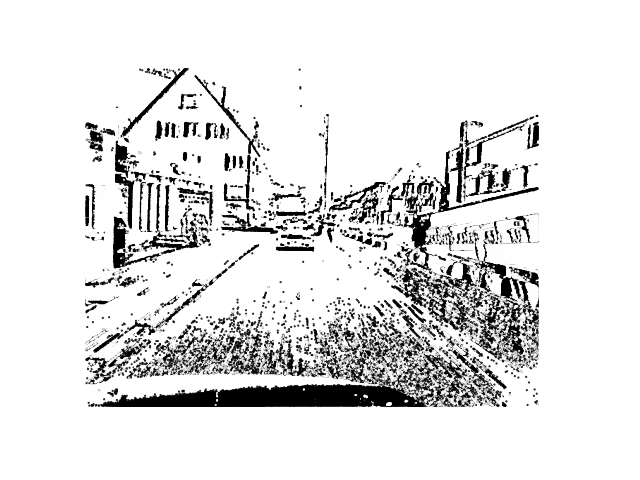

In [7]:
rotated_img

In [9]:
import io
from PIL import Image
x_coords2 = x_coords[(152299794//377)*375:(152299794//377)*376]
y_coords2 = y_coords[(152299794//377)*375:(152299794//377)*376]
polarities2 = polarities[(152299794//377)*375:(152299794//377)*376]
# plt.figure(figsize=(8, 6))
plt.axis('off')

plt.scatter(x_coords2, y_coords2, c=polarities2, cmap='gray', marker='.', s=1)
plt.savefig('scatter_plot2.png')
plt.close()
img = Image.open('scatter_plot2.png')

# # Convert the image to grayscale
grayscale_img = img.convert('L')

# Rotate the grayscale image by 180 degrees
rotated_img = grayscale_img.rotate(180)
# plt.title('Event Camera Data')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.gca().invert_yaxis()  # Invert y-axis to match typical image coordinates
# plt.colorbar(label='Polarity')
# plt.show()
# point1 = list(map(list, zip(x_coords2, y_coords2)))
# non_zero_coords, labels, unique_labels, colors=db_scanner(polarities2,y_coords2,x_coords2,epsilon = 5,min_samples = 300)    
# for label, color in zip(unique_labels, colors):
#         if label == -1:
#             # Noise points (not assigned to any cluster)
#             plt.scatter(non_zero_coords[labels == label][:, 0], non_zero_coords[labels == label][:, 1], color='black', s=10, marker='.')
#         else:
#             plt.scatter(non_zero_coords[labels == label][:, 0], non_zero_coords[labels == label][:, 1], color=color, s=30, marker='o', label=f'Cluster {label}')
    
# plt.title('DBSCAN Clustering of Event Camera Data with Non-zero Polarity')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()
# fig = plt.gcf() 

  
# Create a Function for Converting a figure to a PIL Image. 
  
  
# def fig2img(fig): 
#     buf = io.BytesIO() 
#     fig.savefig(buf) 
#     buf.seek(0) 
#     img = Image.open(buf) 
#     return img 
# img = fig2img(fig) 

# centroids = calculate_centroids(non_zero_coords, labels)
# print("Centroids of clusters:", centroids)

In [100]:
import cv2
edges = cv2.Canny(np.array(rotated_img), 100, 200)
Image.fromarray(edges).save('edges2.png')

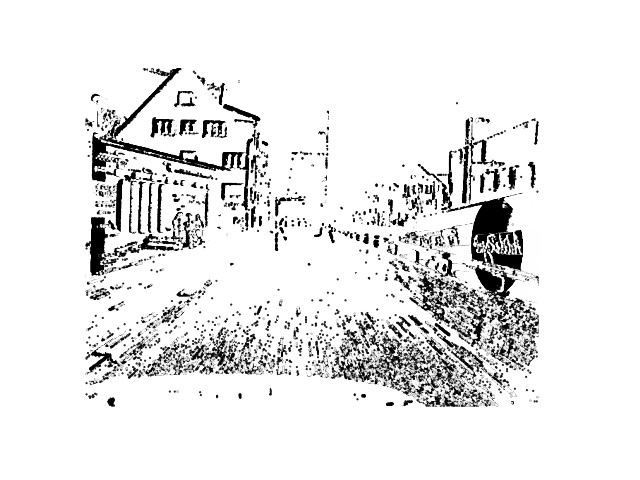

In [95]:
rotated_img

In [91]:
import cv2
auto, H = cv2.findHomography(np.array(point1[:100]), np.array(point2[:100]), cv2.RANSAC,3)


In [94]:
resultant_image = cv2.warpPerspective(original_image, H, (original_image.shape[1], original_image.shape[0]))


[[ 2.07398187e-04 -1.26529831e-01  2.42427810e+01]
 [ 3.26396661e-02 -1.40561304e+00  2.56355788e+02]
 [ 1.10464361e-04 -5.44118564e-03  1.00000000e+00]]


In [30]:
import cv2
import numpy as np

# Load the images in grayscale
img1 = cv2.imread('/home/irfan/research/scatter_plot1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/home/irfan/research/scatter_plot2.png', cv2.IMREAD_GRAYSCALE)
img1=cv2.rotate(img1, cv2.ROTATE_180)
img2=cv2.rotate(img2, cv2.ROTATE_180)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use FLANN based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    # print("m: ", m.distance, "n: ", n.distance)
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
    

# Minimum number of matches6
MIN_MATCH_COUNT = 10
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
    
    # Calculate homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Use homography
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, H)
    
    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    
    print("Homography Matrix:")
    print(H)
    
    # Display images with keypoints
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # cv2.imshow('Matches', img_matches)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print(f"Not enough matches are found - {len(good_matches)}/{MIN_MATCH_COUNT}")


Homography Matrix:
[[ 8.44383114e-01 -1.96330953e-01  3.35688387e+01]
 [-1.44115074e-02  7.14503213e-01  2.74692123e+01]
 [-7.31698438e-05 -7.42762745e-04  1.00000000e+00]]


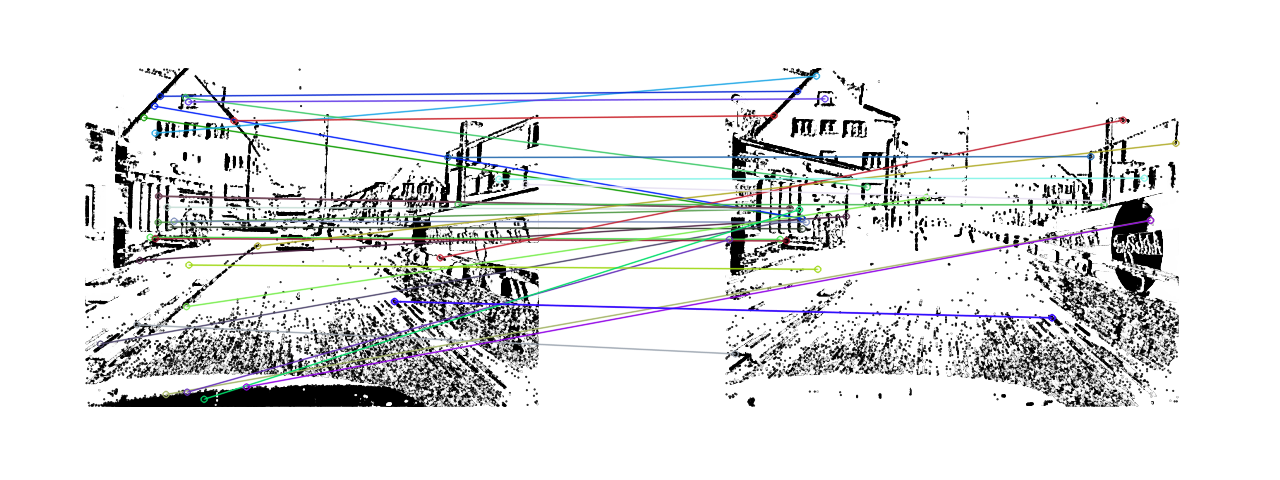

In [31]:
Image.fromarray(img_matches)

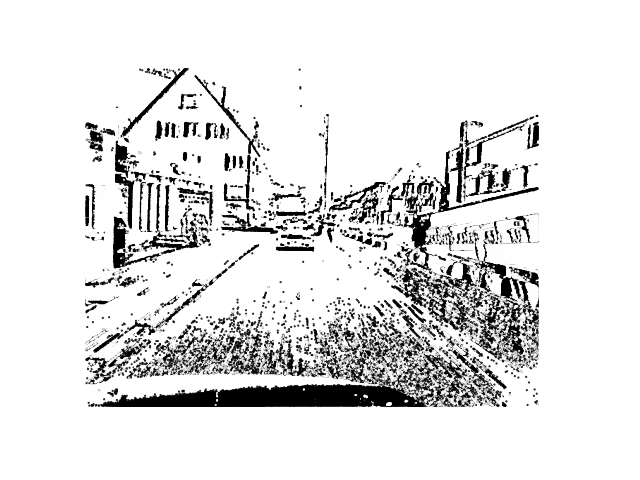

In [46]:
Image.fromarray(img1)

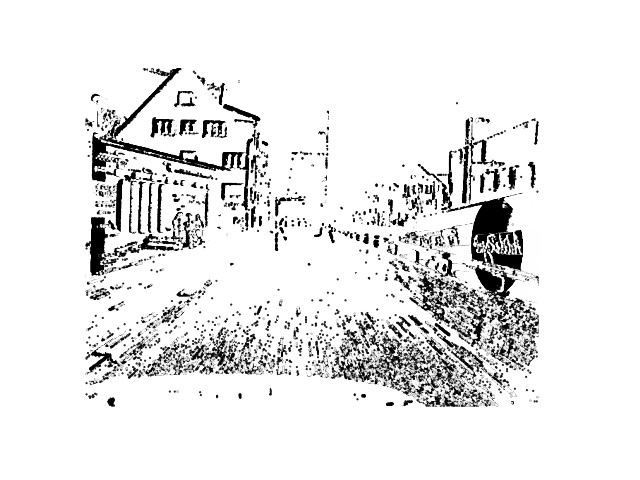

In [47]:
Image.fromarray(img2)

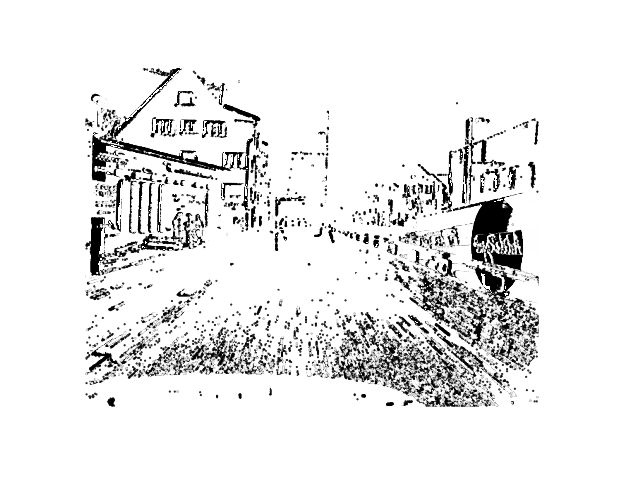

In [40]:
Image.fromarray(img2)   

In [74]:
height, width = img2.shape
print("height: ", height, "width: ", width)
projected_img = cv2.warpPerspective(img1, H, (width, height))
common_pixels = img2 == projected_img
print(common_pixels.shape)
# diff_img = np.zeros_like(rotated_img)
diff_img = np.zeros_like(img2)
# Set the pixels where intensities are the same to 255
diff_img[common_pixels] = 255
# height, width = projected_img.shape
# print("height: ", height, "width: ", width)
# resultant_image=img2-projected_img
# Image.fromarray(resultant_image)

height:  480 width:  640
(480, 640)


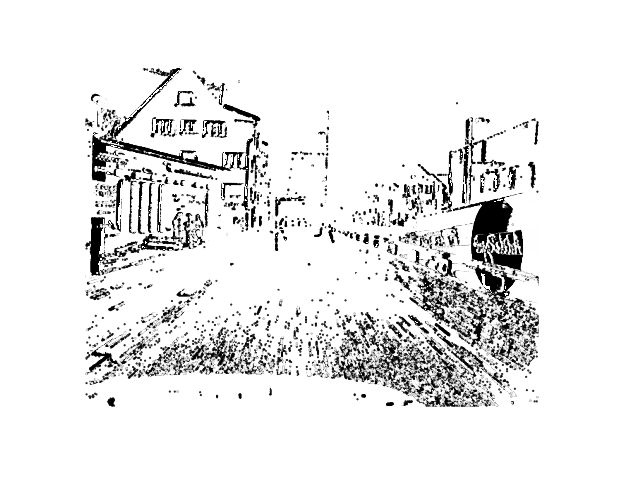

In [75]:
Image.fromarray(img2)

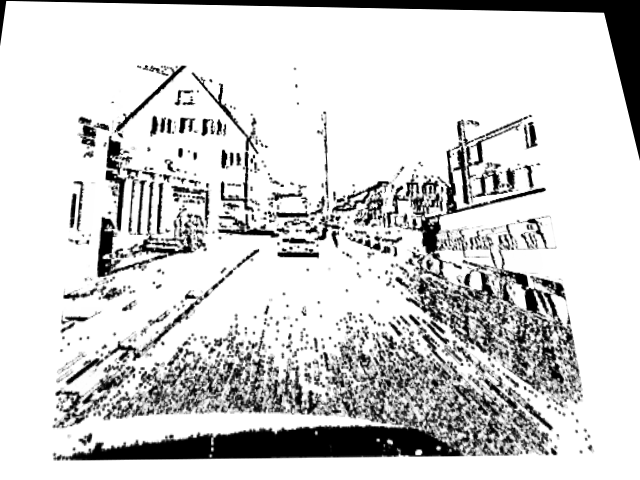

In [76]:
Image.fromarray(projected_img)

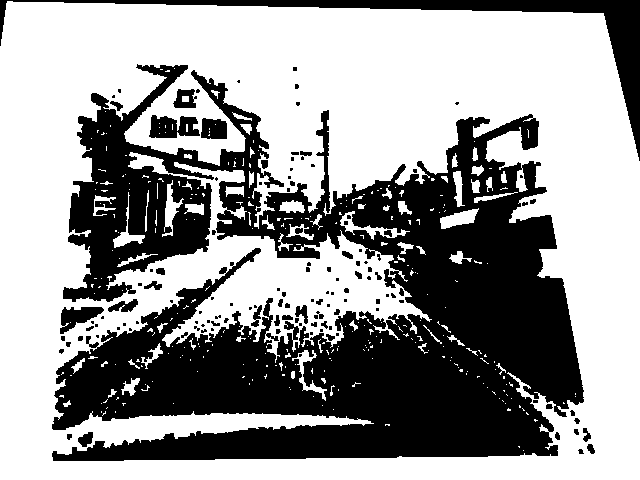

In [77]:
Image.fromarray(diff_img)

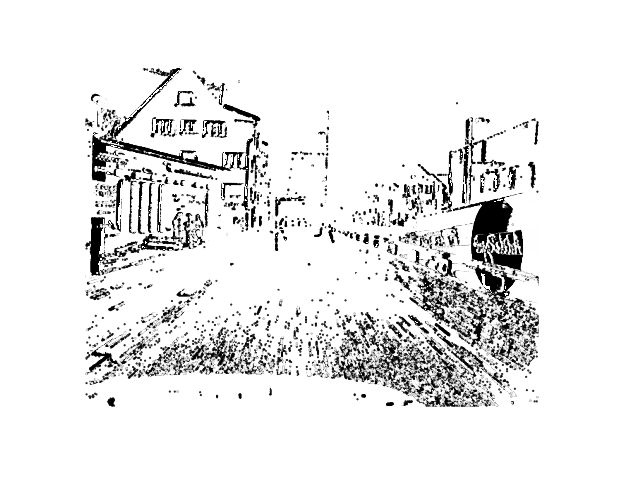

In [78]:
Image.fromarray(img2)

In [102]:
import cv2
import numpy as np

# Load the images in grayscale
img1 = cv2.imread('/home/irfan/research/edges1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/home/irfan/research/edges2.png', cv2.IMREAD_GRAYSCALE)
# img1=cv2.rotate(img1, cv2.ROTATE_180)
# img2=cv2.rotate(img2, cv2.ROTATE_180)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect key points and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use FLANN based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Minimum number of matches
MIN_MATCH_COUNT = 10
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
    
    # Calculate homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Use homography
    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, H)
    
    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    
    print("Homography Matrix:")
    print(H)
    
    # Display images with keypoints
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # cv2.imshow('Matches', img_matches)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print(f"Not enough matches are found - {len(good_matches)}/{MIN_MATCH_COUNT}")


Homography Matrix:
[[ 1.36971070e+00 -4.75136430e-02 -5.22644830e+01]
 [ 1.46280269e-01  1.11126443e+00 -3.34034773e+01]
 [ 4.58380919e-04 -3.71021957e-05  1.00000000e+00]]


In [103]:
height, width = img2.shape
print("height: ", height, "width: ", width)
projected_img = cv2.warpPerspective(img1, H, (width, height))
common_pixels = img2 == projected_img
print(common_pixels.shape)
# diff_img = np.zeros_like(rotated_img)
diff_img = np.zeros_like(img2)
# Set the pixels where intensities are the same to 255
diff_img[common_pixels] = 255
# height, width = projected_img.shape
# print("height: ", height, "width: ", width)
# resultant_image=img2-projected_img
# Image.fromarray(resultant_image)

height:  480 width:  640
(480, 640)


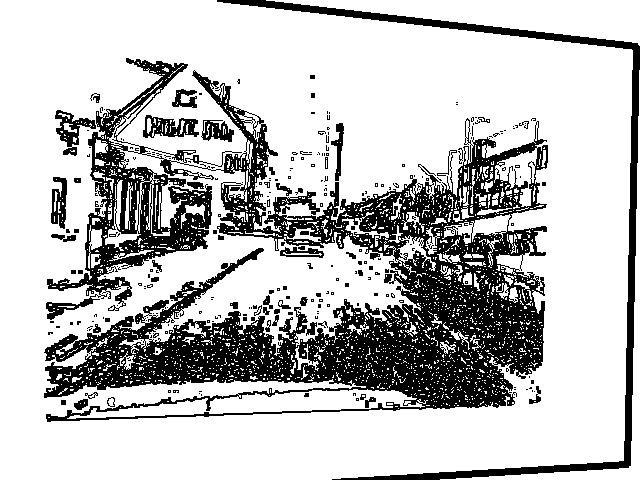

In [104]:
Image.fromarray(diff_img)

In [3]:
import cv2
import numpy as np

def detect_harris_corners(img, block_size=2, ksize=3, k=0.04):
    """
    Detect corners using Harris Corner Detector
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, blockSize=block_size, ksize=ksize, k=k)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    corners = np.float32(centroids)  # Ensure coordinates are floats
    return corners

def match_corners(corners1, corners2, img1, img2):
    """
    Match corners using ORB and FLANN-based matcher
    """
    # Convert centroids to KeyPoint objects
    kp1 = [cv2.KeyPoint(x[0], x[1], 1) for x in corners1]
    kp2 = [cv2.KeyPoint(x[0], x[1], 1) for x in corners2]
    
    # Extract descriptors using ORB
    orb = cv2.ORB_create()
    kp1, des1 = orb.compute(img1, kp1)
    kp2, des2 = orb.compute(img2, kp2)
    
    # Match descriptors using FLANN-based matcher
    FLANN_INDEX_LSH = 6
    index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    
    # Store all the good matches as per Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    
    return kp1, kp2, good_matches

def find_homography(img1, img2):
    """
    Find homography matrix between img1 and img2
    """
    corners1 = detect_harris_corners(img1)
    corners2 = detect_harris_corners(img2)
    
    kp1, kp2, good_matches = match_corners(corners1, corners2, img1, img2)
    
    if len(good_matches) > 4:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)
        
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        return H
    else:
        print("Not enough matches are found - {}/{}".format(len(good_matches), 4))
        return None

# Load images
img1 = cv2.imread('/home/irfan/research/scatter_plot1.png')
img2 = cv2.imread('/home/irfan/research/scatter_plot2.png')

# Find homography matrix
H = find_homography(img1, img2)

if H is not None:
    print("Homography matrix:")
    print(H)
else:
    print("Homography matrix could not be computed")


Homography matrix:
[[ 8.93616260e-01  2.30423522e-01 -3.75092090e+01]
 [-1.54925692e-01  1.26318417e+00 -2.80913524e+01]
 [-4.44283038e-04  5.21567555e-04  1.00000000e+00]]


In [9]:
height, width,_ = img2.shape
print("height: ", height, "width: ", width)
projected_img = cv2.warpPerspective(img1, H, (width, height))
common_pixels = img2 == projected_img
print(common_pixels.shape)
# diff_img = np.zeros_like(rotated_img)
diff_img = np.zeros_like(img2)
# Set the pixels where intensities are the same to 255
diff_img[common_pixels] = 255
# height, width = projected_img.shape
# print("height: ", height, "width: ", width)
# resultant_image=img2-projected_img
# Image.fromarray(resultant_image)

height:  480 width:  640
(480, 640, 3)


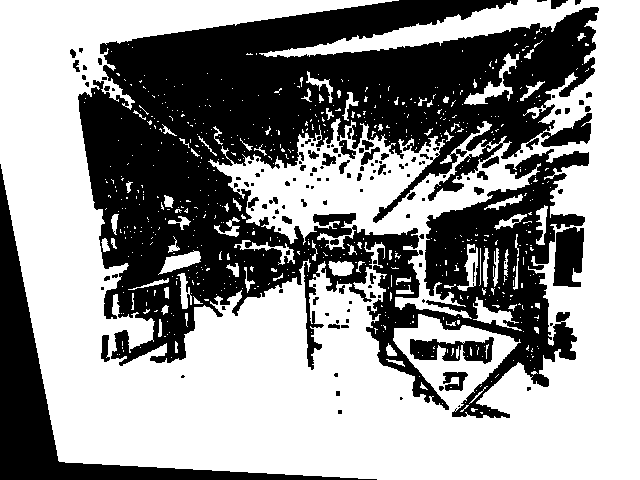

In [7]:
from PIL import Image
Image.fromarray(diff_img)